# EDA: Diagnosing Diabetes

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [104]:
# number of columns
print(len(diabetes_data.columns))
diabetes_data.info()

9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [105]:
# number of rows
len(diabetes_data)

768

## Cleaning Data

In [106]:
# finding whether columns contain null values
print(diabetes_data.isnull().sum())
diabetes_data.info()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: 

In [107]:
# performing summary statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Minimum values are 0 for several columns above, which can't be right.

In [108]:
# replacing instances of 0 with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [109]:
# finding whether columns contain null values after replacements are made
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [110]:
# rows with missing values
diabetes_data[diabetes_data.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Many patients didn't have insulin measured.

In [111]:
# replacing null values with mean for each column
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(np.NaN, diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean())

In [112]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
# data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


In [114]:
# unique values of Outcome column
diabetes_data.Outcome.unique()

array(['1', '0', 'O'], dtype=object)

Replacing the O with 0.

In [115]:
diabetes_data.Outcome = diabetes_data.Outcome.replace('O', '0')
diabetes_data.Outcome = diabetes_data.Outcome.astype(int)
print(diabetes_data.Outcome.unique())
diabetes_data.info()

[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [116]:
diabetes_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


## Visualizing Data using Matplotlib and Seaborn

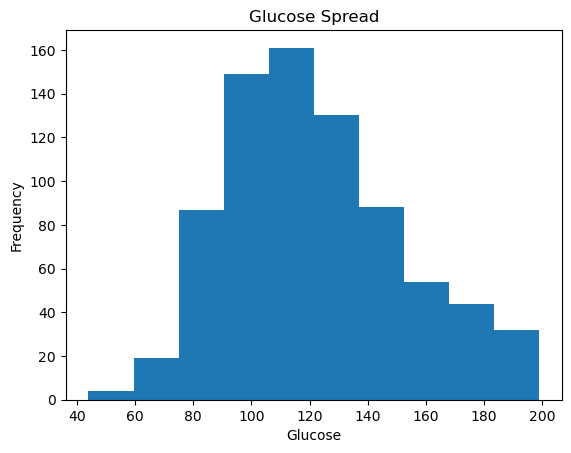

<Figure size 640x480 with 0 Axes>

In [119]:
plt.hist(diabetes_data.Glucose)
plt.title('Glucose Spread')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()
plt.clf()

## Is there a significant difference in glucose levels between patients with positive diabetes outcomes

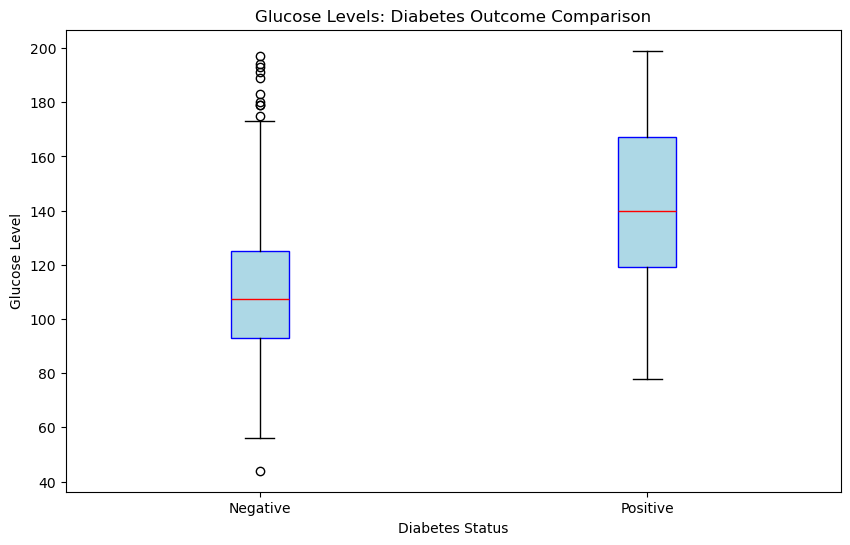

In [129]:
# Seperating data by outcome
diabetes_negative = diabetes_data[diabetes_data.Outcome == 0]
diabetes_positive = diabetes_data[diabetes_data.Outcome == 1]

# Converting 'Glucose' to numeric
diabetes_negative = diabetes_negative.copy()
diabetes_positive = diabetes_positive.copy()

diabetes_negative.loc[:, 'Glucose'] = pd.to_numeric(diabetes_negative['Glucose'], errors='coerce')
diabetes_positive.loc[:, 'Glucose'] = pd.to_numeric(diabetes_positive['Glucose'], errors='coerce')

# Creating boxplots
plt.figure(figsize=(10, 6))

# Data
data = [diabetes_negative['Glucose'].dropna(), diabetes_positive['Glucose'].dropna()]

plt.boxplot(data, labels=['Negative', 'Positive'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Glucose Levels: Diabetes Outcome Comparison')
plt.xlabel('Diabetes Status')
plt.ylabel('Glucose Level')

plt.show()

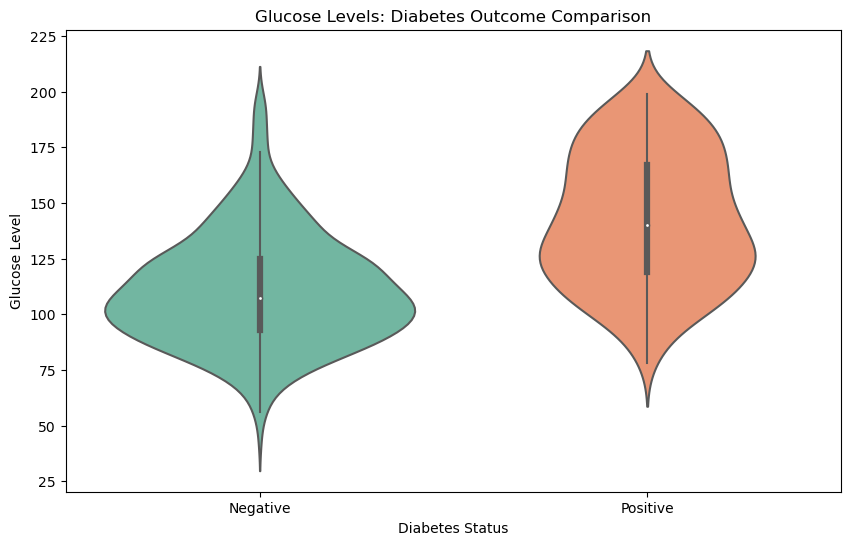

In [138]:
# Violin plot
diabetes_negative['Diabetes'] = 'Negative'
diabetes_positive['Diabetes'] = 'Positive'

data_combined = pd.concat([diabetes_negative[['Glucose', 'Diabetes']],
                           diabetes_positive[['Glucose', 'Diabetes']]])

plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes', y='Glucose', data=data_combined, palette='Set2')
plt.title('Glucose Levels: Diabetes Outcome Comparison')
plt.xlabel('Diabetes Status')
plt.ylabel('Glucose Level')

plt.show()

In [136]:
# calculating the mean difference
diabetes_negative_glucose_mean = np.mean(diabetes_negative.Glucose)
print('Diabetes Negative Glucose Mean: {mean}'.format(mean=diabetes_negative_glucose_mean))

diabetes_positive_glucose_mean = np.mean(diabetes_positive.Glucose)
print('Diabetes Positive Glucose Mean: {mean}'.format(mean=diabetes_positive_glucose_mean))

print('Mean Difference: {mean}'.format(mean=diabetes_positive_glucose_mean-diabetes_negative_glucose_mean))

Diabetes Negative Glucose Mean: 110.71012057667103
Diabetes Positive Glucose Mean: 142.16557285655603
Mean Difference: 31.455452279884994
